In [82]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
sns.set_style('whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.interpolate import *
import random



In [83]:
# add TPak location
df = pd.read_excel('2018-09-11 - distributionl.xlsx')

In [84]:
len(df[df['data'] > 0.048]['data'])

6

In [85]:
df1 = df['data'][df['data']<=0.048]
df1.max()

0.047999999999999994

In [86]:
df1.mean()

0.03149548192771076

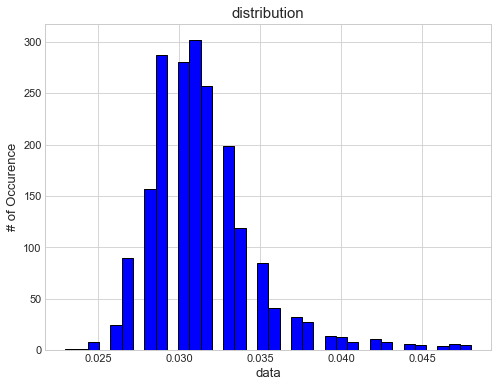

In [87]:
# plot histogram of distribution
fig= plt.figure(figsize=(8,6))
plt.hist(df1, color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
# sns.distplot(df_rdson, hist=True, kde=False, 
#              bins=int(180/5), color = 'blue',
#              hist_kws={'edgecolor':'black'})
# Add labels

plt.rc('xtick', labelsize=11)     
plt.rc('ytick', labelsize=11)

plt.title('distribution', size = 15);
plt.xlabel('data', size = 13);
plt.ylabel('# of Occurence', size = 13);

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


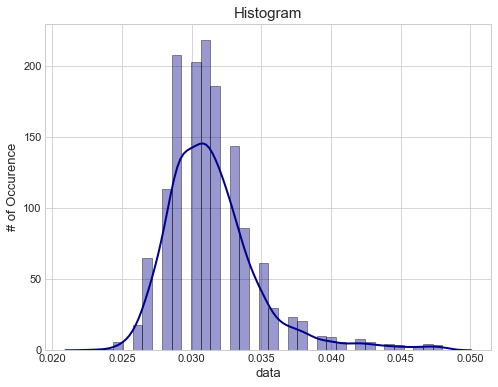

In [88]:
fig= plt.figure(figsize=(8,6));
sns.distplot(df1, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title('Histogram', size = 15);
plt.xlabel('data', size = 13);
plt.ylabel('# of Occurence', size = 13);

In [89]:
g = []
for x in range (0, 100):
    m = random.sample(list(df_rdson), 1)
    g.append(m)
    

In [90]:
df1.mean()

0.03149548192771076

In [91]:
df1.max()

0.047999999999999994

In [92]:
t = 12*np.array([25, 100, 150, 200])
data_typical = 1e-3*np.array([31,41,51,67]) #single die
data_min = 1e-3*np.array([20,30,39,51]) 
data_max = 1e-3*np.array([48,59,66,80]) 

In [93]:
poly_typical = np.polyfit(t, data_typical, 2)
poly_min = np.polyfit(t, data_min, 2)
poly_max = np.polyfit(t, data_max, 2)

In [94]:
poly_min

array([3.20147787e-09, 6.06111450e-06, 1.79350214e-02])

In [66]:
poly_typical

array([5.49454274e-09, 2.14053285e-06, 2.99853569e-02])

In [67]:
poly_max

array([3.53365874e-09, 5.33302827e-06, 4.63480781e-02])

In [68]:
r = np.array([data_min[0], data_typical[0], data_max[0]])
t2_term = np.array([poly_min[0], poly_typical[0], poly_max[0]])
t1_term = np.array([poly_min[1], poly_typical[1], poly_max[1]])
t0_term = np.array([poly_min[2], poly_typical[2], poly_max[2]])

In [69]:
interp_t2  = interpolate.interp1d(r, t2_term)
interp_t1  = interpolate.interp1d(r, t1_term)
interp_t0  = interpolate.interp1d(r, t0_term)


Rx = 40e-3
t2x = interp_t2(Rx)
t1x = interp_t1(Rx)
t0x = interp_t0(Rx)

In [70]:
x = np.linspace(20e-3,48e-3,1e3*(48e-3-20e-3+1e-3));

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


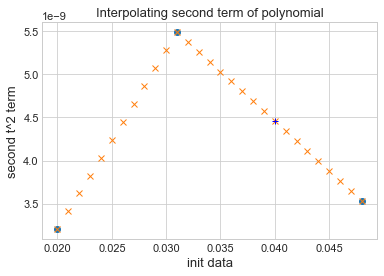

In [71]:
plt.plot(r,t2_term,'o')
plt.plot(x,interp_t2(x),'x')
plt.plot(Rx, interp_t2(Rx),'b+')
plt.title('Interpolating second term of polynomial', size = 13);
plt.ylabel('second t^2 term', size = 13);
plt.xlabel('init data', size = 13);

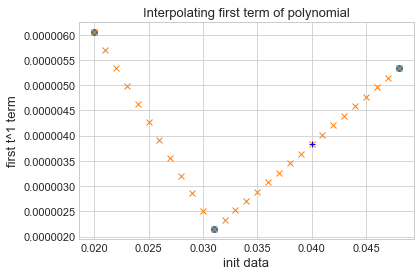

In [72]:
plt.plot(r,t1_term,'o')
plt.plot(x,interp_t1(x),'x')
plt.plot(Rx, interp_t1(Rx),'b+')
plt.title('Interpolating first term of polynomial', size = 13);
plt.ylabel('first t^1 term', size = 13);
plt.xlabel('init data', size = 13);

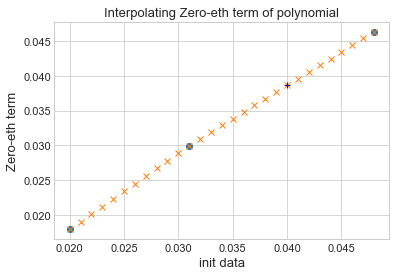

In [73]:
plt.plot(r,t0_term,'o')
plt.plot(x,interp_t0(x),'x')
plt.plot(Rx, interp_t0(Rx),'b+')
plt.title('Interpolating Zero-eth term of polynomial', size = 13);
plt.ylabel('Zero-eth term', size = 13);
plt.xlabel('init data', size = 13);

In [74]:
Rx = 40e-3
polyx = np.array([interp_t2(Rx), interp_t1(Rx), interp_t0(Rx)])
t2x = interp_t2(Rx)
t1x = interp_t1(Rx)
t0x = interp_t0(Rx)

data_sample = polyx[0]*t**2 + polyx[1]*t + polyx[2]
data_sample

array([0.04019826, 0.04966204, 0.05998202, 0.07351062])

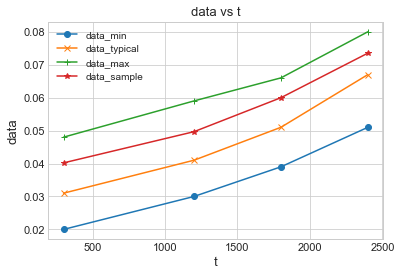

In [75]:
plt.plot(t, data_min, 'o-', label = 'data_min')
plt.plot(t, data_typical, 'x-', label = 'data_typical')
plt.plot(t, data_max, '+-', label = 'data_max')
plt.plot(t, data_sample, '*-', label = 'data_sample')
plt.title('data vs t', size = 13);
plt.ylabel('data', size = 13);
plt.xlabel('t', size = 13);
plt.legend();

In [76]:
# sample from a normal distributionwith tolerance of part
part_tolerance = 0.05 # 
mean, std = 1, part_tolerance/4
sample = np.random.normal(mean, std, 1000)

In [77]:
abs(mean - np.mean(sample)) < 0.01

True

In [78]:
abs(std - np.std(sample, ddof=1)) <0.01

True

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


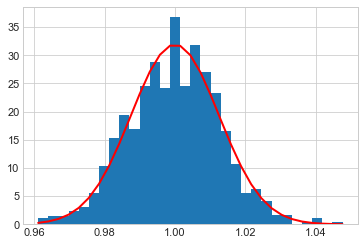

In [79]:
count, bins, ignored = plt.hist(sample, 30, normed=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2) ), linewidth=2, color='r')
plt.show()

In [80]:
np.std(sample)

0.01282611366018859

In [81]:
np.max(sample)

1.047621734327138